<a href="https://colab.research.google.com/github/zaina0k/DataScience/blob/Week-1---Regression-Analysis/Wksp1Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression from Scratch

**Step-by-step guide of Linear Regression**
1. Define a function that computes 'ax+b'
2. Calculate the difference of prediction (y_hat) and y
3. Define how you are going to update 'a' and 'b', and change their value
4. Iterate above

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [ ]:
x = 5 * np.random.rand(100, 1)
y = 3 * x + 5 * np.random.rand(100, 1)

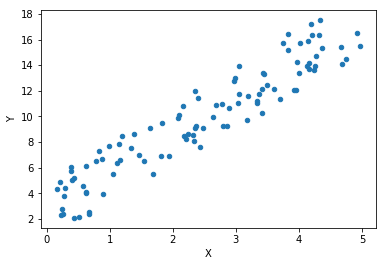

In [ ]:
# TODO: look how our data look like
None

In [ ]:
'''
Step 1
Define a function that computes 'ax+b'
outputs predicted array'''

def prediction(a, b, x):
    # TODO: return 'x*(transposed)a + b'
    equation = None
    return equation

In [ ]:
'''Step 2
2. Calculate the difference of prediction and y
'''
learning_rate = 1e-4

# TODO: how do you calculate error
def caculate_error(a, b, x, y):
    error = None
    return error

'''Step 3
3. Define how you are going to updata 'a' and 'b'
'''
# By how much are you going to update a and b?
def update_ab(a, b, x, error, lr):
    # Update a
    delta_a = -(lr * (2 / len(error)) * (np.dot(x.T, error)))
    # Update b
    delta_b = -(lr * (2 / len(error)) * np.sum(error))

    return delta_a, delta_b

'''Step 4
4. step 2 and step 3 within iteration
'''
# calculate error for given number of times, and update a and b
def gradient_descent(x, y, iteration):
    # initial a and b set to a=0 and b=0
    a = np.zeros((1, 1))
    b = np.zeros((1, 1))

    for i in range(iteration):
        # print("a: ", a)
        # print("b: ", b)
        # TODO: get error
        error = None
        # print("error: ", error)
        # TODO: get 'delta'ed a and b
        delta_a, delta_b = None
        # update a and b
        a -= delta_a
        b -= delta_b

    return a, b

final a: [[0.06926274]] final b: [[0.02132223]]
final a: [[0.63248182]] final b: [[0.19513642]]
final a: [[2.18479395]] final b: [[0.68166754]]
final a: [[2.96314883]] final b: [[0.94018321]]
final a: [[3.2967225]] final b: [[1.42016148]]


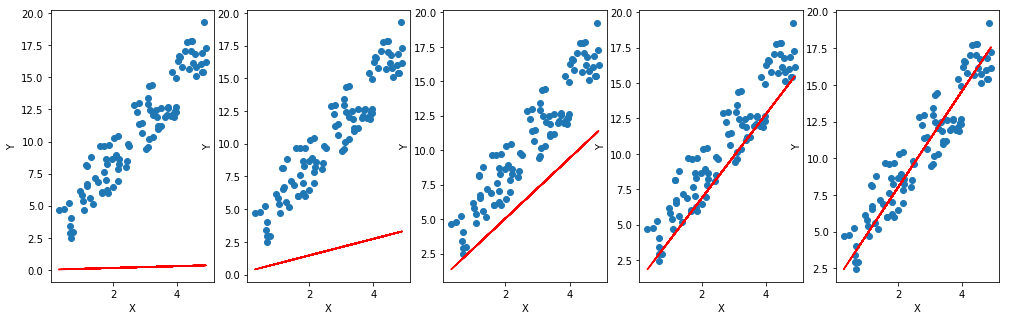

In [ ]:
iterations = [10, 100, 500, 1000, 10000]

fig, ax = plt.subplots(1, 5, figsize=(17, 5))

for index, iteration in enumerate(iterations):
    # TODO get final a and b from gradient descent
    final_a, final_b = None
    print("final a:", final_a, "final b:", final_b)

    # Visualise 5 iteration graphs
    # y_pred = final_a[0][0] * x + final_b
    y_pred = prediction(final_a, final_b, x)
    ax[index].scatter(x, y)
    ax[index].plot(x, y_pred, color='r')
    ax[index].set_xlabel('X')
    ax[index].set_ylabel('Y')

plt.show()


Play around with learning rate and iteration, and try to find the best learning rate!  
What if learning rate is very big? What if it's very small?  
What you are doing right now is called Hyper-parameter Tuning / Optimisation!  
It is a whole different area, so I will not go very deep into it for now, but I encourage you to Google it.  
Let's get back to this topic after we learn Deep Learning :)

## Linear Regression using sklearn

1. Load LR model with  
    **linear_model = sklearn.linear_model.LinearRegression()**

2. Train your model with  
    **LinearRegression.fit(x, y)**

3. Predict y_hat with  
    **LinearRegression.predict(x)**

reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression

# TODO: Load LR model!
model = None

# TODO: Train!
model.None(x, y)

# TODO: Predict!
predicted = model.None(x)

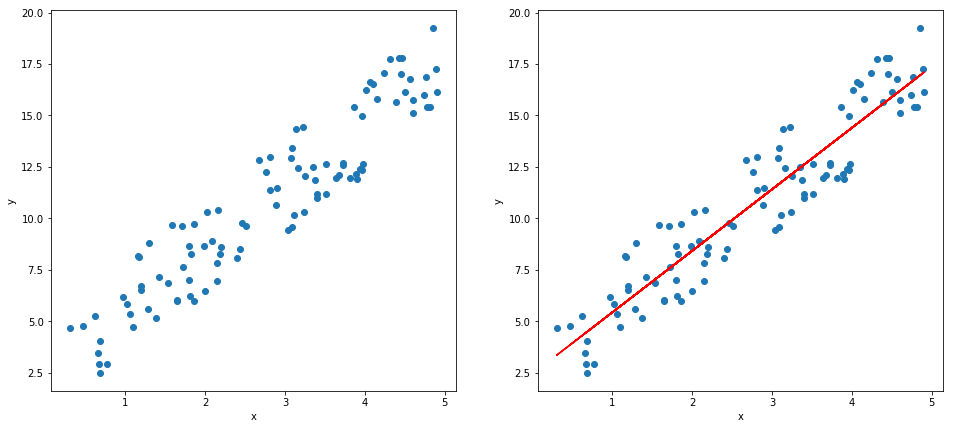

In [ ]:
# Visualise
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

ax[0].scatter(x, y)
ax[1].scatter(x, y)
ax[1].plot(x, predicted, color='r')

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.show()

## Multiple Linear Regression

[Good mathematical explanation](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704-EP713_MultivariableMethods/BS704-EP713_MultivariableMethods2.html)

In [ ]:
import csv
csvReader = csv.reader(open("Advertisement.csv"))
# skip the header
next(csvReader)

x = []
y = []

for row in csvReader:
    x_i = [float(row[1]), float(row[2]), float(row[3])]
    x.append(x_i)

    y_i = float(row[4])
    y.append(y_i)

X = np.array(x)
Y = np.array(y)
print(X.shape)
print(Y.shape)
assert len(X)==len(Y)

(200, 3)
(200,)


In [ ]:
# TODO: load linear regression model
model = None
# TODO: fit the model
model.None(X, Y)
Y_pred = model.None(X)

In [ ]:
print(model.coef_)
print(model.intercept_)
# TODO: get coeficients for each beta
beta_0 = None   # Facebook
beta_1 = None   # Instagram
beta_2 = None   # Twitter
beta_3 = None

[ 0.04576465  0.18853002 -0.00103749]
2.938889369459405


In [ ]:
# Inference
# infer an expected sales based on given values
def expected_sales(fb, insta, twitter, beta_0, beta_1, beta_2, beta_3):
    # Multiple Linear Regression Model
    sales = (beta_0 * fb) + (beta_1 * insta) + (beta_2 * twitter) + beta_3
    return sales

In [ ]:
# Sales prediction
expectation = expected_sales(100, 200, 0, beta_0, beta_1, beta_2, beta_3)
print("Expected Sales: {}".format(expectation))

# Question: What do you get for (1, 0, 0), (0, 1, 0), (0, 0, 1) and (0, 0, 0)

Expected Sales: 45.221357298640044


## Polynomial Regression

Let's do Polynomial Regression using scikit-learn!  

What if our training points are non-linear and resemble curvy cosine or cubic function? We need Polynomial Regression, which is often called as Multivariate Regression

**PolynomialFeatures(degree)**: creates Polynomial object  
        `degree`: Degree of the polynomial

**PolynomialFeatures.fit_transform(x)**: returns polynomial variables, which are 'x' and 'x to the power of degree'  

Check this link out!!  
[sklearn document](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Random generation of x and y
x = 3 * np.random.rand(100, 3) + 1
y = (x ** 2) + x + 2 + 5 * np.random.rand(100, 3)

print("x.shape: ", x.shape)

# TODO: Create PolynomialFeature object(degree=2, include_bias=False)
poly_feat = None

# TODO: transform your data (eg: x=[x1, x2] --> poly_x=[1, x1, x2, x1^2, x1x2, x2^2])
poly_x = None
print("poly_x.shape: ", poly_x.shape)

# TODO: Load a model. Which model should you load?
linear_model = None

# TODO: fit your model
linear_model.None;

x.shape:  (100, 3)
poly_x.shape:  (100, 10)


In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

def plotting_learning_curves(model, x, y):
    # TODO: split your data into train and validation (8:2)
    x_train, x_val, y_train, y_val = None
    len_train = len(x_train)

    train_errors = []
    validation_errors = []

    for i in range(1, len_train):
        model.fit(x_train[:i], y_train[:i])
        pred_train = model.predict(x_train[:i])
        pred_val = model.predict(x_val)

        # TODO: get mean squared error of train data
        train_error = None

        # TODO: get mean squared error of validation data
        validation_error = None

        train_errors.append(train_error)
        validation_errors.append(validation_error)

    # plotting part
    plt.plot(np.sqrt(train_errors), 'r', label="Train")
    plt.plot(np.sqrt(validation_errors), 'b', label="Validation")

    plt.xlabel("size of data")
    plt.ylabel("loss")

    plt.legend(
        loc='upper right',
        shadow=True,
        fancybox=True,
        borderpad=1  # border padding of the legend box
    )

    plt.show()


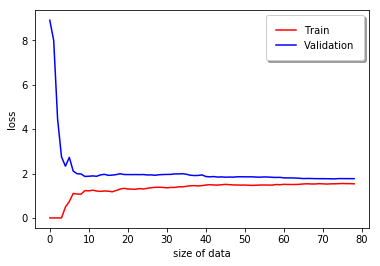

In [ ]:
plotting_learning_curves(linear_model, x, y)


## 2. Logistic Regression and Classification

As it has been mentioned in the slides, in the classification problems we have a set of inputs that belong to 2 or more categories and we have to train model to assign new set of inputs to corresponding categories.

Although there are many existing classification models, in this lecture we will focus on the **logistic regression**.

### Logistic Regression

Even though it includes the regression term, it is more related to classification than regression models. Logistic regression is essentially used to calculate the probability of a binary event.

Before going too much in-depth to the logistic regression model, we will first analyze its *'building blocks'*.

#### Sigmoid function

![sigmoid function](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

The sigmoid function (seen above), maps any real values to a range of 0 and 1. As we train, logistic regression model, we are basically aiming to find the threshold value: the values above threshold is considered as 1, while values below threshold are 0.

The sigmoid function itself can be expressed mathematically as
$g(z) = \frac{1}{1 + \exp(-z)}$. In Python code, this could be expressed as:

In [ ]:
import numpy as np

def sigmoid(z):
    # TODO: calculate the sigmoid function
    None

#### Logistic regression hypothesis

So far we know how to express the sigmoid function in mathematical and code notations. We also know that in the logistic regression the inputs are passed through the sigmoid in order to determine the classification threshold value.

However, how does this connection translate in mathematics?

As you might remember from the last notebook, the linear regression had hypothesis $ \hat{y} = \theta ^T x$. For the logistic regression, this hypothesis becomes: $ \hat{y} = \frac{1}{1 + \exp(-\theta ^T x)}$.

The hypothesis can be written as:

In [ ]:
def hypothesis(X, theta):
    z = np.dot(X, theta)
    # TODO: calculate the 'last step' of the vector of predicted values
    y_hat = None

    return y_hat

#### Cost function

At this point, we have our function for our logistic function probability output. On the other hand, in order to actually train our model, we also have to define our cost function.

In the linear regression case, our cost function had the following form:
$\frac{1}{m} \sum_{i = 1}^m(\hat{y_{i}} - y_{i}) ^ 2$. Here $\hat{y_{i}}$ is the output of our probability function while $y_{i}$ is the actual label. On the other hand, our probability function $\hat{y}$ has a more complicated expression that would make it quite hard to find its optimum (function would have many local minimum points). Therefore, the cost function for the logistic regression can be written as: $J(\theta) = -\frac{1}{m} \sum_{i = 1}^m (y_{i} \log{(\hat{y}_{i})} + (1-y_{i}) \log{(1 - \hat{y}_{i})})$.

In code this can be expressed as:

In [ ]:
def cost(y_hat, y):
    # TODO: Write a Python expression to evaluate the cost function
    cost = None
    return cost

#### Gradient

The optimization process in ML models is usually based on the gradient descent algorithm. We will analyze it much more in depth in the near future lectures, however, just for the purpose of this tutorial, understand it as a way of finding the minimum of the function. As you might remember from the math lessons, the minimum point can be found with the use of derivatives. As we want to analyze the cost function in respect to $\theta$, we need to differentiate our cost function: $\frac{1}{m} X^T (\hat{y} - y)$.

The gradient descent formula for updatint $\theta$ values, therefore, becomes:
$\theta = \theta - lr.\frac{1}{m} X^T (\hat{y} - y)$

The code for finding the optimal $\theta$ becomes:

In [ ]:
def gradient_descent(x_train, y_train, lr, epochs):
    intercept = None # TODO: create intercepts to add to the x_train dataset
    x_train = None # TODO: concatenate those intercepts to the x_train dataset respectively
    theta = None # TODO: create a vector for parameters

    m = len(x_train)

    for i in range(epochs):
        y_hat = hypothesis(x_train, theta)
        gradient = np.dot(x_train.T, (y_hat - y_train)) / m

        theta -= None

    return theta

#### Prediction

After finding the optimal $\theta$, the prediction process is quite straightforward - we just simply need to make a new hypothesis. The output of such function ($\hat{y}$) will be a probability in the range from $0$ to $1$, therefore, we need to map values according to $0.5$ threshold.

In [ ]:
def predict(x_train, y_train, x_test, lr, epochs):

    theta = gradient_descent(x_train, y_train)
    intercept = None
    x_test = None
    y_hat =None

    y_pred = []

    for i in range(len(y_hat)):
        if(y_hat[i] >= 0.5):
            y_pred.append(1)
        else:
            y_pred.append(0)

    return y_pred

### Exercise

Let's now put it all together into a simple logistic model. For this example exercise, we will use one of the sklearn datasets (Iris).

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import classification_report,accuracy_score


iris = load_iris()

#Features
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [ ]:
############-------Tasks to do-------------------##########################

In [ ]:
# TOD0: Split the X, y dataset into x_train, x_test, y_train and y_test
x_train, x_test, y_train, y_test = None

In [ ]:
#---Building the model

#sigmoid function
def sigmoid(z):
    return None

#hypothesis function
def hypothesis(X, theta):
    z = np.dot(X, theta)
    y_hat = None

    return y_hat

#cost function
def cost(y_hat, y):
    cost = None
    return cost

#gradient descent function
def gradient_descent(x_train, y_train, lr, epochs):
    intercept = None
    x_train = None
    theta = None
    lr = 0.01
    epochs = 100

    m = len(x_train)

    for i in range(epochs):
        y_hat = None
        gradient = None

        theta -= None

    return theta

#prediction function
def predict(x_train, y_train, x_test, lr, epochs):

    theta = None
    intercept = None
    x_test = None
    y_hat = None

    y_pred = []

    for i in range(len(y_hat)):
        if(y_hat[i] >= 0.5):
            y_pred.append(1)
        else:
            y_pred.append(0)

    return y_pred

In [ ]:
#assigning learning rate and epochs values (can leave as it is or change it)
lr = 0.01
epochs = 100

In [ ]:
#predicting values
y_pred = predict(x_test, y_test, x_test, lr, epochs) #here should be your prediction function
print('Accuracy on test set: ' + str(accuracy_score(y_test, y_pred)))